# Objective 

Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is to get you comfortable working in Python.

You are expected to do the following :

 1. Come up with a customer profile (characteristics of a customer) of the different products
 2. Perform univariate and multivariate analyses
 3. Generate a set of insights and recommendations that will help the company in targeting new customers

**Context** - The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

 1. Product - The model no. of the treadmill
 2. Age -  Age of the customer in no of years
 3. Gender - Gender of the customer
 4. Education - Education of the customer in no. of years
 5. Marital Status - Marital status of the customer
 6. Usage - Avg. # times the customer wants to use the treadmill every week
 7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
 8. Income - Income of the customer
 9. Miles- Miles that a customer expects to run
 
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

# Load Libraries

In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')


# Import and Check Data set 

In [6]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
df.shape #checks shape

(180, 9)

* *The dataset has 180 rows and 9 columns*

In [8]:
df.info() #checks info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* *There are 6 numeric columns and 3 object columns, 180 total entries* 

In [9]:
# categorical column should be converted to categorical type 

df['Gender']= df.Gender.astype('category')
df['Product']= df.Product.astype('category')
df['MaritalStatus']= df.MaritalStatus.astype('category')

In [10]:
print(df.isnull().sum()) # print the numbers of missing values in the column

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


* *No values missing in this data set*

# Exploratory Data Analysis

In [11]:
#Making a list of all catrgorical variables 
cat_col=['Product', 'Gender', 'MaritalStatus']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------


 **Observations**
 
  - TM195 is the most sold treadmill model
  - There are more Male customers (104) buying treadmills than Females (74)
  - More Married (107) vs. Single (73) Customers 

In [12]:
list_col=['Product','MaritalStatus','Usage','Fitness','Education','Age']
#displays columns and data types
for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

PRODUCT :['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798'] 
MARITALSTATUS :['Single', 'Partnered']
Categories (2, object): ['Single', 'Partnered'] 
USAGE :[3 2 4 5 6 7] 
FITNESS :[4 3 2 1 5] 
EDUCATION :[14 15 12 13 16 18 20 21] 
AGE :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 


**Summary:**

   - There are 3 different treadmill products
   - Marital Status is Single or Partnered
   - Age of Customers is 18 to 50
   - Education in years is from 12-21
   - Usage is from day to 7 days a week
   - Fitness Level of customers is from 1 to 5


In [13]:
df.describe() #summarizes data

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


   **Observations**
   - The maximum income level and mileage appear to be far about central tendancies
   - Many consumers rate themselves at a level 3 fintess and usage
   - Very few consumers over age 33
   - Customer education is between 12 and 21 years with average of 16 years

## **Measuring variables against each product line**

   ### TM195  

In [14]:
df[df['Product'] == 'TM195'].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


**Observations**
 - 80 customers bought TM195
 - Average Age = 28.5 
 - Average Education Level is 15 yrs
 - Expected Usage is 3 days a week
 - Fitness Ranges from 1 - 5 with an average of 3
 - Average income 46k and is maxed at 68K
 - Average Miles = 83 


### TM498

In [15]:
df[df['Product'] == 'TM498'].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**Observations**
 - 60 customers bought TM498
 - Average Age = 28.9 
 - Average Education Level is 15.1 yrs
 - Expected Usage is 3 days a week
 - Fitness Ranges from 1 - 4 with an average of 2.9
 - Average income is 49k and maxed at 67K
 - Average Miles = 88  

### TM798

In [16]:
df[df['Product'] == 'TM798'].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**Observations**
 - 40 customers bought TM798
 - Average Age = 29.1 
 - Average Education Level is 17.3 yrs
 - Expected Usage is 4.7 days a week
 - Fitness Ranges from 3 - 5 with an average of 4.6
 - Average income is 75k and maxed at 106K
 - Average Miles = 166 

# Visulization

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.    
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

# Univariate Analysis

## Observation on Age

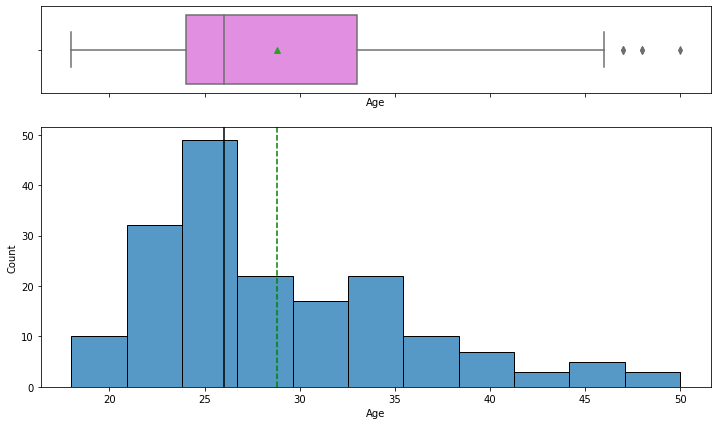

In [18]:
histogram_boxplot(df, 'Age')

 - Age is skewed left near late 20s with a few outliers over the age of 45
 - Most customers are age 23-35

## Observation on Education

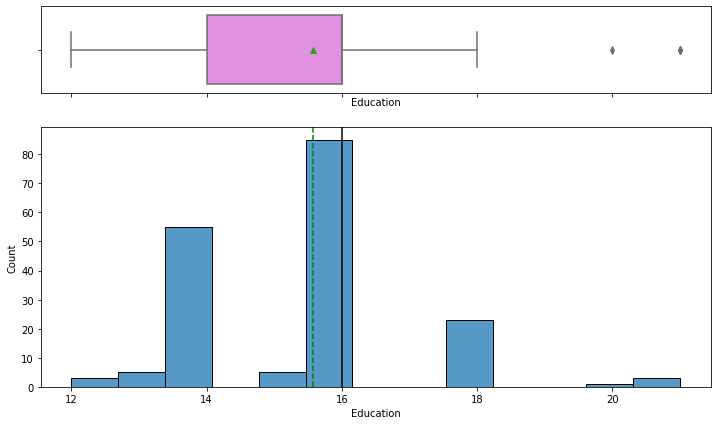

In [19]:
histogram_boxplot(df, 'Education')


## Observation on Income 

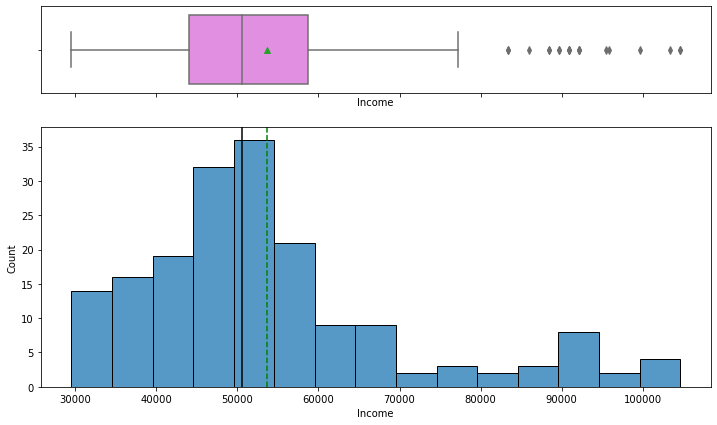

In [20]:
histogram_boxplot(df, 'Income')

 - Income has heavy central tendancy around 54k
 - Many outliers exist over 75k 

## Observation on Usage

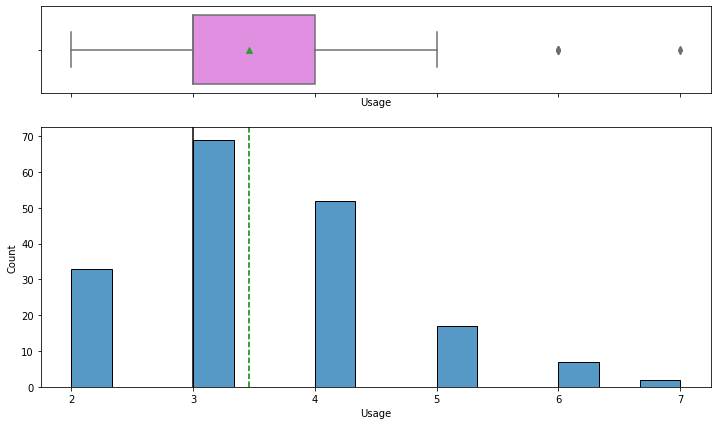

In [21]:
histogram_boxplot(df, 'Usage')

 - Most of customers expect they will be using the treadmill 3-4 days per week
 - There are few outliers where customer are expecting to use treadmill for 6 or 7 times a week

## Observation on Fitness

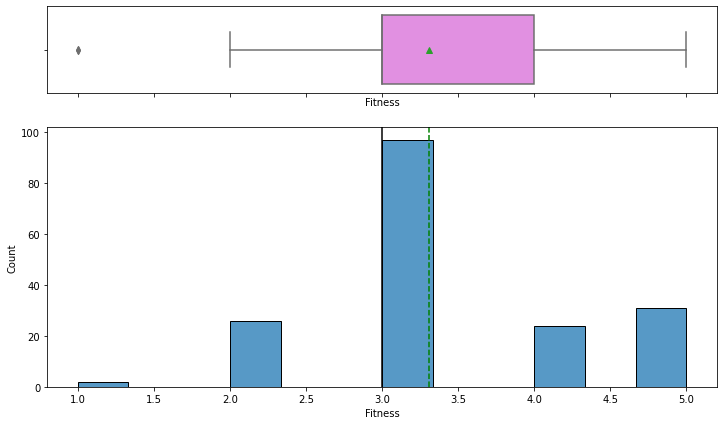

In [22]:
histogram_boxplot(df, 'Fitness')

 - Most Customers have self assessed fitness levels at 3

# Observation on Miles 

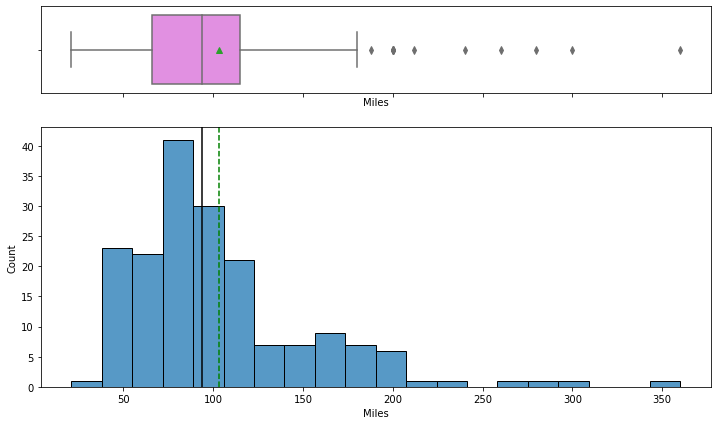

In [23]:
histogram_boxplot(df, 'Miles')

 - Miles are skewed to the left
 - A heavey central tendancy exists around 80 miles per week

    

# Observation on Treadmill Model Sales

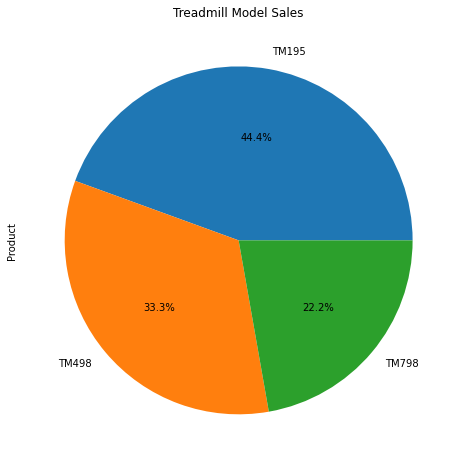

In [24]:
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Treadmill Model Sales")
plt.show()

- Lower models make up the greater proportion of sales
- TM798 is only 22% of product sales


## Observation on Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

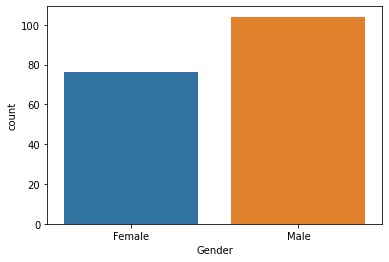

In [25]:
sns.countplot(df.Gender)


 - There are more males customers than females

## Observation on Marital Status

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

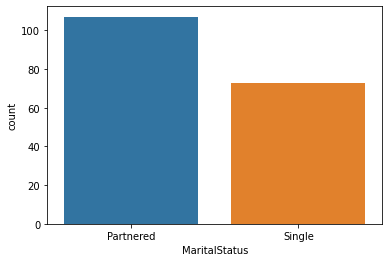

In [26]:
sns.countplot(df.MaritalStatus)

* There are more Partnered customers than Single

# Bivariate Analysis

In [27]:
#Average age of customer buying each model
df.groupby('Product')['Age'].mean()


Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [28]:
#Average Income of customer buying each model
df.groupby('Product')['Income'].mean()


Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [29]:
#Average Miles of customer buying each model
df.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

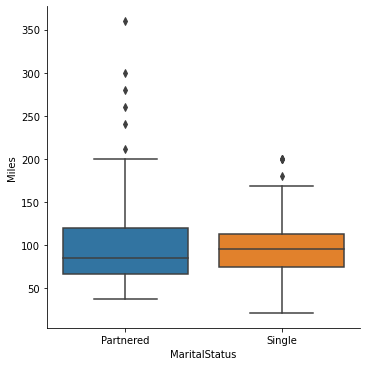

In [30]:
sns.catplot( x = "MaritalStatus", y = 'Miles', data = df, kind = 'box')

 - Single customers plan to run less

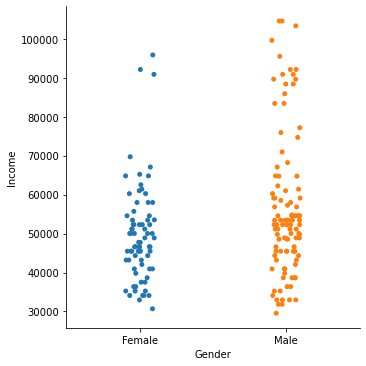

In [31]:
sns.catplot( x = 'Gender', y = 'Income', data = df)


 - Males have higher income than females

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5, 1.0, 'PRODUCT BY GENDER')

<Figure size 864x864 with 0 Axes>

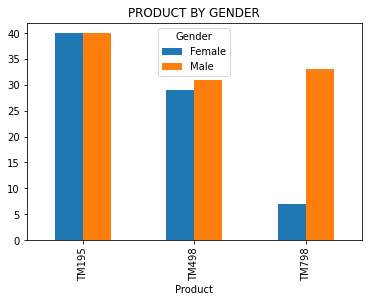

In [32]:
plt.figure(figsize=(12,12))
prd_gender=pd.crosstab(df['Product'],df['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("PRODUCT BY GENDER")

**Observation**

 - Males and Females bought the TM195 model equallly
 - Compared to females, male bought TM498 model .
 - Very few females purchased TM798 model.


# Multivariate Analysis

<Figure size 864x504 with 0 Axes>

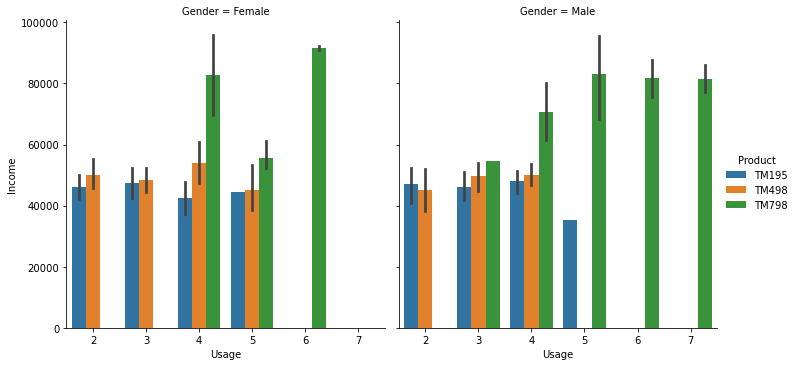

In [33]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df) 


**Observations**

  - There is no difference in income range between customers who purchased TM195 and TM498
  - These customers expect to use TM195 and TM498 three to four times a week
  - Male customer with higher income, bought TM798 Model and expect to use treadmill 4-6 /week



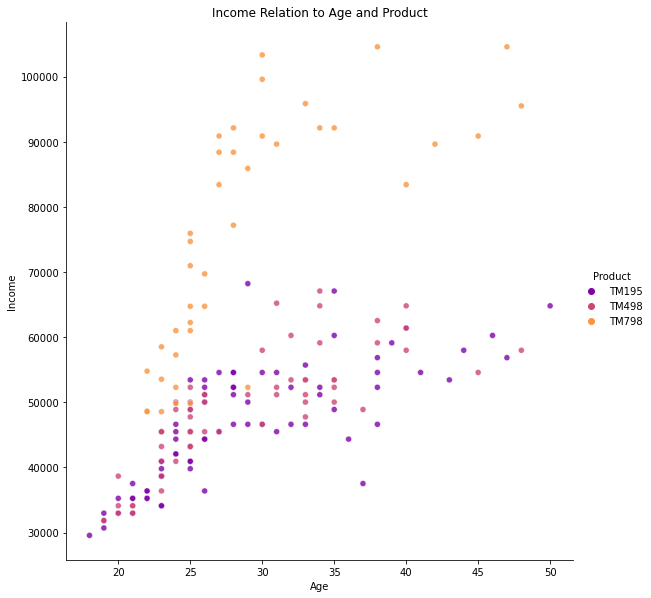

In [34]:
#scatter plot between income, age, and product
sns.relplot(x="Age", y="Income", hue="Product", alpha=.8, palette="plasma",
            height=8, data=df).set(title='Income Relation to Age and Product')

**Observations**
 - TM798 is bought by customers with the highest income levels and age range is more concentrated around 23-30
 - All customers purchasing TM195 and TM498 had income less than 70K

# Correlation 

<AxesSubplot:>

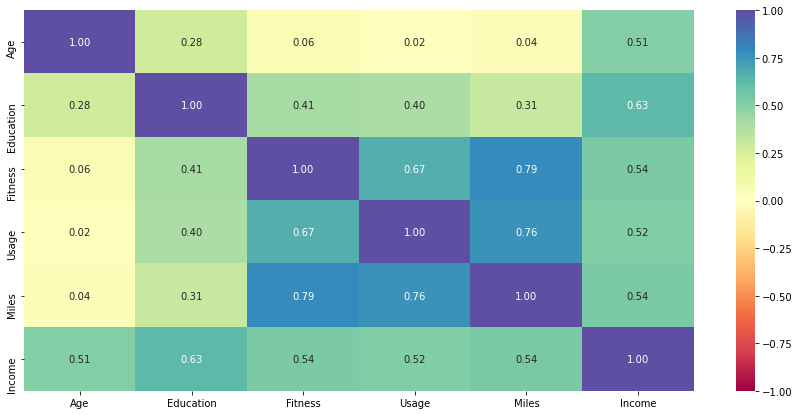

In [35]:
# Check for correlation among numerical variables
num_var = ['Age','Education','Fitness','Usage','Miles', 'Income']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns)

**We can find high correlation between following values.**

 - Miles and Usage
 - Miles and Fitness
 - Income and Education
 - Fitness and Usage



# Summary

 - TM195 model is the most purchased model with 44.4%
 - There are more Male customers than Female customers, with males also being heavier users
 - More partner customers than single purchase treadmills and they also plan to run further
 - Majority of customers earn less than 70K 



# Recommendations

 - Further research should be conducted to see if there is appetite to appeal to Customers over the age of 35. 
 - There is an overall lack in female customers and campaigns should be targeted to appeal to this demographic
 - Campaigns could be marketed for the TM789 to athletic couples looking to train for distance races since they tend to run higher miles 
 - TM789 should be considered luxury treadmill for athletes 
 - There may be an opportunity to target a college new grad audience with TM195. Offering a deal to recent graduates would increase sales to the single and lower income population 